<h1> ANN: Artificial Neural Networks </h1>
<br>
<h4> What are ANNs ? </h4>
<p>Artificial neural networks, usually simply called neural networks or neural nets, are computing systems inspired by the biological neural networks that constitute animal brains.</p>

<img align='left' width='500' src='https://www.tutorialspoint.com/artificial_intelligence/images/atypical_ann.jpg'>
<img align='right' width='500' src='https://miro.medium.com/max/1400/1*rptqFUQTMiruWZWKm-WMqQ.png'>


<p align ='right'> It contains input layer which is used to provide inputs to the neural networks.<br> This is then moved on to the hidden layer which computes various things.<br>And based on those computations we get the output layer<br>  Which neurons of the output layer is turned on determines where its classifed. In simple terms ANN is just a fancy classifier  </p>

<br>
<br>
<h4> Steps of ANN </h4>
<p> Here are simplified steps related to ANN which should be understood before coding </p>
<ol>
    <li> Initalize with random weights and bias </li>
    <li> Compute z for all input layers </li>
    <li> Feed z into activation function </li>
    <li> Procced to forward propagation on all layers </li>
    <li> Compute the cost function /loss function and Back propagate </li>
    <li> During Back Propagate adjusts weights and biases </li>
    <li> Repeat steps 2 to 6 untill n epochs </li>
</ol>
<h2> Project 1. Plant type predictor (Perceptron) </h2>

<h3> 0. Installing Dependencies </h3>

In [ ]:
!pip install pandas
!pip install numpy

<h3> 1. Importing Dependencies </h3>

In [165]:
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt

<h3> 2. Collecting Data set </h3>

In this data set their are lengths of leafs and widths of their leaves and their corresponding color patterns associated with it.


In [161]:
df=pd.read_csv('Flower_dataset.csv')
df
features=np.array(df[['X1','X2']])
labels=np.array(df['Y']).reshape(-1,1)


[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]


<h3> 3. Perceptron Creation </h3>

<h4> 3.1 Plotting Graph to understand data </h4>

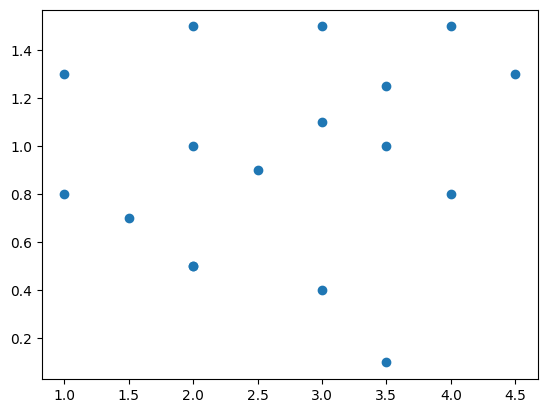

In [190]:
plt.scatter(x=df['X1'],y=df['X2'])

<h4> 3.2 Coding Perceptron  </h4>

Enter value of length and width seperate with comma: 3,1.5
[3.0, 1.5]
1


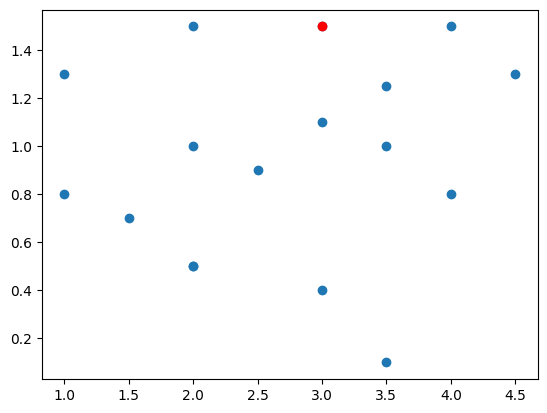

In [193]:
def sigmoid(x):    
    return 1/(1+np.exp(-x))

def cost(P,A):
    return (P-A)**2

def d_cost(P,A):
    h=0.001
    return (cost(P+h,A)-cost(P,A))/h

def d_sigmoid(x):
    h=0.0001
    return (sigmoid(x+h)-sigmoid(x))/h




def train_model_perceptron(weights,bias,alpha,features,labels,epochs):
    for epoch in range(int(epochs)): 
        z=np.dot(features,weights)+bias
        P=[sigmoid(i) for i in z]
        for index in range(len(z)):
            weights=[weights[indx]-alpha*d_cost(P[index],labels[index][0])*d_sigmoid(z[index])*features[index][indx] for indx in range(len(weights))]    
            bias=bias-alpha*d_cost(P[index],labels[index][0])*d_sigmoid(z[index])
    return weights,bias

<h4> 3.3 Testing Perceptron </h4>

Enter value of length and width seperate with comma: 2,2
[2.0, 2.0]
1


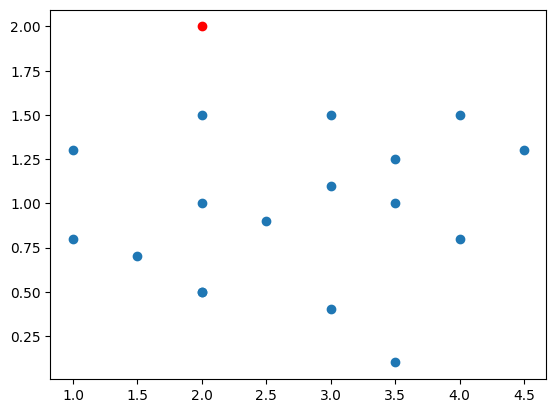

In [194]:
weights=np.array([0.25,0.65])
bias=0.25
alpha=0.001

weights,bias=train_model_perceptron(weights,bias,alpha,features,labels,3500)
input_val=[float(i) for i in (input('Enter value of length and width seperate with comma: ')).split(',')]
print(input_val)
z=np.dot(input_val,weights)+bias
output=sigmoid(z)
if output>=0.50:
    output=1 
else: 
    output=0
print(output)

#See where our point lies at the end 
plt.scatter(x=df['X1'],y=df['X2'])
plt.scatter(x=input_val[0],y=input_val[1],color='red')
#Assignment plot the hypothetical line that is sperating 2 classes linear seperator.
plt.show()

<h2> Project 2. XOR Gate Predictor (Any dimension) </h2>
Inially we try to build the XOR Predictor using Preceptron then we move on to coding Neural Network with tensorflow and applying it on the same problem 

<h3> 1. Create Dataset for XOR Gate  </h3>
Let's create a dataset for any number of input XOR Gate 

In [30]:
def generate_dataset(dims):

    def xor_output(x):
        return x%2


    df=pd.DataFrame()
    for i in range(0,dims):
        while True: 
            A=[random.randrange(0,2) for i in range(0,2**dims)]
            if A.count(1)==(2**dims)/2:
                break
        df[str(i)]=A

    op=0
    for i in df.columns:
        op+=df[i]

    df['Y']=op
    df['Y']=df['Y'].apply(xor_output)
    df
    return df 

dims=int(input('Enter number of dims: '))
data=generate_dataset(dims)
data

Enter number of dims: 2


,0,1,Y
0,0,1,1
1,0,0,0
2,1,1,0
3,1,0,1


<h3> 2. Perceptron Creation </h3>
    <p>  we take input and then multiple with respective weights and biases </p>

<h3> Rough for Flower classification seems to work need serious reworking </h3>

In [44]:
def generate_weights(data):
    print(data.columns)
    n=len(data.columns)-1
    return [random.uniform(0,1) for i in range(n)],random.uniform(-1,1)


def train_model(data,weights,bias):
    
    features=data.drop(columns=['Y'])
    labels=data['Y'].to_list()
   
    #converting to numpy arrays
    features=np.array(features)
        
    weights=np.array(weights)
    bias=np.array(bias)

    for epochs in range(0,3500):
        z=np.dot(features,weights)+bias
        for index in range(len(z)):
            gradient_decent_=d_cost(sigmoid(z[index]),labels[index])*d_sigmoid(z[index])
            weights=np.array(weights)-alpha*np.array(gradient_decent_)*np.array(features[index])
            bias=np.array(bias)-alpha*np.array(gradient_decent_)
            

    return weights,bias

alpha=10**-3
weights,bias=generate_weights(data)
print('Before Training: ')
print(weights)
print(bias)
print('\n\n')
weights,bias=train_model(data,weights,bias)
print(weights)
print(bias)

Index(['0', '1', 'Y'], dtype='object')
Before Training: 
[0.8279023804437374, 0.24318394392941922]
0.5056699016320401



Vector Dimensions checking: 
[[0 1]
 [0 0]
 [1 1]
 [1 0]]
(4, 2)
(2,)
-------------------------
[0.37104076 0.01659074]
-0.1015196431816501


In [26]:
print(weights)
print(bias)
print((sigmoid(np.dot(weights,[1,0,0])+bias)))


[0.0216248  0.20894392 0.49168562]
-0.4262175003717754
0.4002093959431934


<h3>4. Tensorflow development </h3>

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_dim=(data.drop(columns=['Y'])).shape[1]))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128*2,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

X=np.array(data.drop(columns=['Y']))
Y=np.array(data['Y']).reshape(-1,1)
model.fit(X,Y,epochs=300)




Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.6954 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6953 - accuracy: 0.3750
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.3750
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6949 - accuracy: 0.3750
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 14ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6939 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6937 - accuracy: 0.6250
Epoch 11/300
1/1 [======

1/1 [==============================] - 0s 9ms/step - loss: 0.6831 - accuracy: 0.8750
Epoch 85/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.8750
Epoch 86/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6829 - accuracy: 0.8750
Epoch 87/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6828 - accuracy: 0.8750
Epoch 88/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6827 - accuracy: 0.8750
Epoch 89/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6826 - accuracy: 0.8750
Epoch 90/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6825 - accuracy: 0.8750
Epoch 91/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.8750
Epoch 92/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6823 - accuracy: 0.8750
Epoch 93/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.8750
Epoch 94/300
1/1 [===========

1/1 [==============================] - 0s 23ms/step - loss: 0.6760 - accuracy: 0.8750
Epoch 167/300
1/1 [==============================] - 0s 21ms/step - loss: 0.6759 - accuracy: 0.8750
Epoch 168/300
1/1 [==============================] - 0s 12ms/step - loss: 0.6759 - accuracy: 0.8750
Epoch 169/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6758 - accuracy: 0.8750
Epoch 170/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6757 - accuracy: 0.8750
Epoch 171/300
1/1 [==============================] - 0s 17ms/step - loss: 0.6756 - accuracy: 0.8750
Epoch 172/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6755 - accuracy: 0.8750
Epoch 173/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6755 - accuracy: 0.8750
Epoch 174/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6754 - accuracy: 0.8750
Epoch 175/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.8750
Epoch 176/300
1

1/1 [==============================] - 0s 9ms/step - loss: 0.6698 - accuracy: 0.8750
Epoch 249/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6697 - accuracy: 0.8750
Epoch 250/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6696 - accuracy: 0.8750
Epoch 251/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6695 - accuracy: 0.8750
Epoch 252/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6695 - accuracy: 0.8750
Epoch 253/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6694 - accuracy: 0.8750
Epoch 254/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6693 - accuracy: 0.8750
Epoch 255/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6692 - accuracy: 0.8750
Epoch 256/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6692 - accuracy: 0.8750
Epoch 257/300
1/1 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.8750
Epoch 258/300
1/1 [===

In [27]:

print(model.predict([[1,0,0]]))

1/1 [==============================] - 0s 68ms/step
[[0.51162314]]


<h3> Testing some hypothesis </h3>

In [186]:
import matplotlib.pyplot as plt 

features=np.array([[3,1.5],
                [2,0.5],
                [4,1.5],
                [2.5,0.9],
                [3.5,1.25],
                [2,0.5],
                [4.5,1.3],
                [1,0.8],
                [1.5,0.7],
                [2,1.5],
                [2,1],
                [3,1.1],
                [1,1.3],
                [3.5,0.1],
                [3.5,1],
                [3,0.4],
                [4,0.8]
                ])

labels=np.array([[1],
                [0],
                [1],
                [0],
                [1],
                [0],
                [1],
                [0],
                [0],
                [1],
                [0],
                [1],
                [0],
                [0],
                [1],
                [0],
                [1]])

df=pd.DataFrame(features,columns=['X1','X2'])
df['Y']=labels
print(df)
df.to_csv('Flower_dataset.csv',index=False)


     X1    X2  Y
0   3.0  1.50  1
1   2.0  0.50  0
2   4.0  1.50  1
3   2.5  0.90  0
4   3.5  1.25  1
5   2.0  0.50  0
6   4.5  1.30  1
7   1.0  0.80  0
8   1.5  0.70  0
9   2.0  1.50  1
10  2.0  1.00  0
11  3.0  1.10  1
12  1.0  1.30  0
13  3.5  0.10  0
14  3.5  1.00  1
15  3.0  0.40  0
16  4.0  0.80  1
